In [1]:
import requests
import json
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from os import path

In [2]:
def datamuse(query):
    # http://www.datamuse.com/api/
    url = "https://api.datamuse.com/words?" + query  #max = number of results to return
    response = requests.get(url)
    similar_words = [x['word'] for x in json.loads(response.content)]
    return similar_words

In [3]:
def mc28():
    with open('datasets/sim-eval-master/datasets/mc.csv', newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=';')
        rows = []
        for row in reader: rows.append(row)
        return rows # [[word1, word2, similarity], ...] 

In [4]:
def stss131():
    # https://www.researchgate.net/publication/262411640_A_new_benchmark_dataset_with_production_methodology_for_short_text_semantic_similarity_algorithms
    with open('datasets/stss-131/stss.csv', newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=';')
        rows = []
        for row in reader: rows.append(row)
        return rows # [[index, sentence1, sentence2, avg similarity, standard deviation], ...]

In [5]:
def jaccard(word_list1, word_list2):
    intersection = len(set(word_list1).intersection(word_list2))
    union = len(set(word_list1).union(word_list2))
    jaccard_similarity = intersection / union
    return jaccard_similarity

In [6]:
from functools import reduce, partial
from itertools import starmap

def get_ml(w,c):
    """ Get a function for querying the related words """
    return [lambda: datamuse(
       "{word}&max={count}"
       .format(word=w,count=c)
    ),w]

def relations_to_file(fn, word):
    """
    fn: query function
    word
    """
    filename = "./related-words/{}.ml".format(word)
        
    with open(filename, 'w') as f:
        """ 
        Query the related words one at a time 
        when required for writing to file 
        """
        for word in fn():
            f.write(word)
            f.write('\n')
            
    return filename

def collect_ml_getters(dataset_fn, count=100):
    """ Collect the getters for lazy evaluation """
    return reduce(lambda acc, fns: acc + fns, [
        [get_ml(f,count), get_ml(s,count)]
        for f, s, _ 
        in dataset_fn()
    ], [])

def get_and_write_dataset_words_to_files(dataset_fn, count=30):
    """works for whiles that return tuple with three items per row"""
    return list(starmap(
        relations_to_file, 
        collect_ml_getters(dataset_fn, count)
    ))

# write the files with
response = get_and_write_dataset_words_to_files(mc28)

response = ['./related-words/automobile.ml',
 './related-words/car.ml',
 './related-words/gem.ml',
 './related-words/jewel.ml',
 './related-words/journey.ml',
 './related-words/voyage.ml',
 './related-words/boy.ml',
 './related-words/lad.ml',
 './related-words/coast.ml',
 './related-words/shore.ml',
 './related-words/asylum.ml',
 './related-words/madhouse.ml',
 './related-words/magician.ml',
 './related-words/wizard.ml',
 './related-words/midday.ml',
 './related-words/noon.ml',
 './related-words/furnace.ml',
 './related-words/stove.ml',
 './related-words/food.ml',
 './related-words/fruit.ml',
 './related-words/bird.ml',
 './related-words/cock.ml',
 './related-words/bird.ml',
 './related-words/crane.ml',
 './related-words/implement.ml',
 './related-words/tool.ml',
 './related-words/brother.ml',
 './related-words/monk.ml',
 './related-words/brother.ml',
 './related-words/lad.ml',
 './related-words/crane.ml',
 './related-words/implement.ml',
 './related-words/car.ml',
 './related-words/journey.ml',
 './related-words/monk.ml',
 './related-words/oracle.ml',
 './related-words/cemetery.ml',
 './related-words/woodland.ml',
 './related-words/food.ml',
 './related-words/rooster.ml',
 './related-words/coast.ml',
 './related-words/hill.ml',
 './related-words/forest.ml',
 './related-words/graveyard.ml',
 './related-words/shore.ml',
 './related-words/woodland.ml',
 './related-words/monk.ml',
 './related-words/slave.ml',
 './related-words/coast.ml',
 './related-words/forest.ml',
 './related-words/lad.ml',
 './related-words/wizard.ml',
 './related-words/cord.ml',
 './related-words/smile.ml',
 './related-words/glass.ml',
 './related-words/magician.ml',
 './related-words/rooster.ml',
 './related-words/voyage.ml',
 './related-words/noon.ml',
 './related-words/string.ml']


KeyboardInterrupt: 

In [ ]:
from os import path
path.exists('./related-words')
with open('./related-words/automobile.ml', 'w') as f:
    f.write('fuk')

In [ ]:
word="jou"
count=20
"ml={word}&max={count}".format(word=word, count=count)

In [ ]:
x()

In [ ]:
datamuse("ml=chair&max=10")

In [ ]:
reduce(lambda acc, g: acc + g, [[0,1],[2,3]], [])

In [ ]:
stss131()

Text(0, 0.5, 'Correlation')

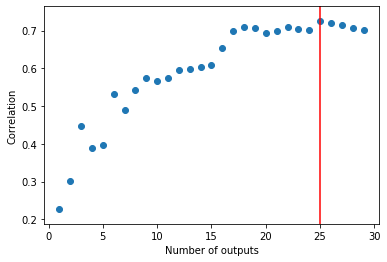

In [7]:
# We would like to test the similarity between the pair (X,Y) by using the output of the Datamuse API 
# for both X and Y. Set the number of outcome words in the API to be large, e.g., 30. Use Jaccard similarity 
# to compute the similarity between X and Y (Counting the ratio of common words among the outputs of X and Y 
# Datamuse API over the total number of distinct words in the two outputs).
#
# Repeat this process of calculating the similarity between each pair in MC-28 dataset, and then calculate the
# correlation coefficient with the human judgment using Pearson coefficient. 
# Try to optimize the parameters ofd atamuse API call by testing distinct number of outputs and monitor the 
# value of the correlation until you reach
# the highest correlation value. 

mc = np.array(mc28())

def calc_mc28_correlation(number_of_outputs):
    get_rel_words = lambda word: np.genfromtxt('./related-words-underscore/' + word + '.ml', dtype="str")
    similarity = lambda row: jaccard(get_rel_words(row[0])[:number_of_outputs], get_rel_words(row[1])[:number_of_outputs])
    datamuse_similarity = np.apply_along_axis(similarity, 1, mc)
    ground_truth = mc.transpose()[2].astype(np.float)
    return np.corrcoef(datamuse_similarity, ground_truth)[0][1]

n = np.arange(1, 30, 1)
corr = np.vectorize(calc_mc28_correlation)(n)

plt.scatter(n, corr)
plt.axvline(x=n[np.argmax(corr)], color="red")
plt.xlabel("Number of outputs")
plt.ylabel("Correlation")

# Use this configuration to calculate the correlation value for other datasets, and 
# compare the result with other state-of-art results as reported in relevant literature (e.g., previous sim-eval 
# repository) .